#### Task 2 : Customer Segmentation Using Unsupervised Learning

`Objective:`
 - Cluster customers based on spending habits and propose marketing strategies tailored to each segment.
 
`Dataset:`
-  Mall Customers Dataset

In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv(r'C:\Users\Dell Pc\Downloads\Mall_Customers.csv')
dataframe

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


###### Exploratory Data Analysis

In [4]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataframe.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
dataframe.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Text(0, 0.5, 'Number of Customers')

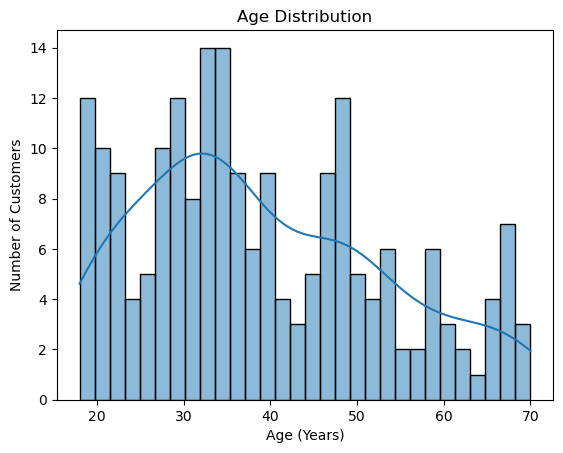

In [14]:
sns.histplot(dataframe['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')  # X-axis label
plt.ylabel('Number of Customers')  # Y-axis label

In [17]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\Semester-4\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Semester-4\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Semester-4\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Semester-4\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

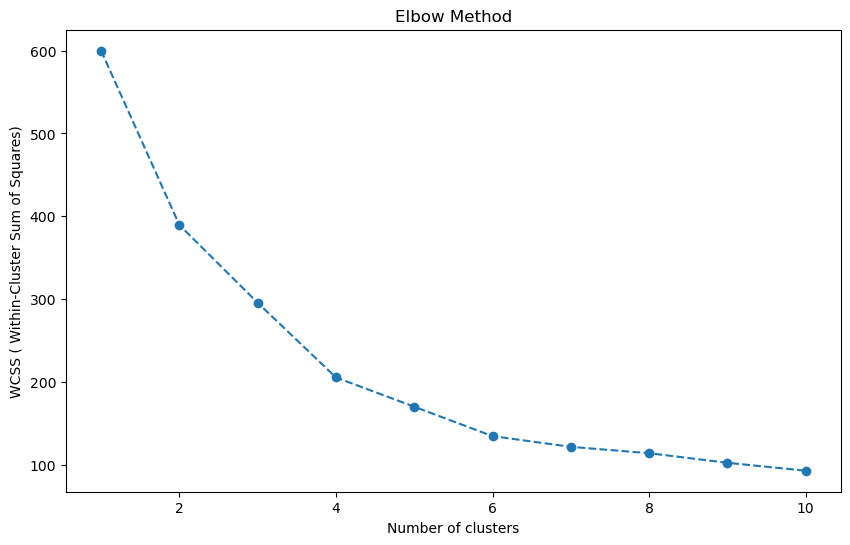

In [19]:
#### Determin ing the Optimal Number of Clusters (Elbow Method)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS ( Within-Cluster Sum of Squares)')
plt.show()

*`WCSS (Within - Cluster sum of squares)`*

- Definition 
    - The sum of squared distances between each data point and its closest cluster center.
    - Within the y axis this is labelled because it shows how tightly grouped points are within clusters

In [26]:
### Apply K-Means Clustering

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original data
dataframe['Cluster'] = clusters

D:\Semester-4\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
dataframe.head(50)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
5,6,Female,22,17,76,4
6,7,Female,35,18,6,5
7,8,Female,23,18,94,4
8,9,Male,64,19,3,8
9,10,Female,30,19,72,4


##### 5. Visualize Clusters with PCA

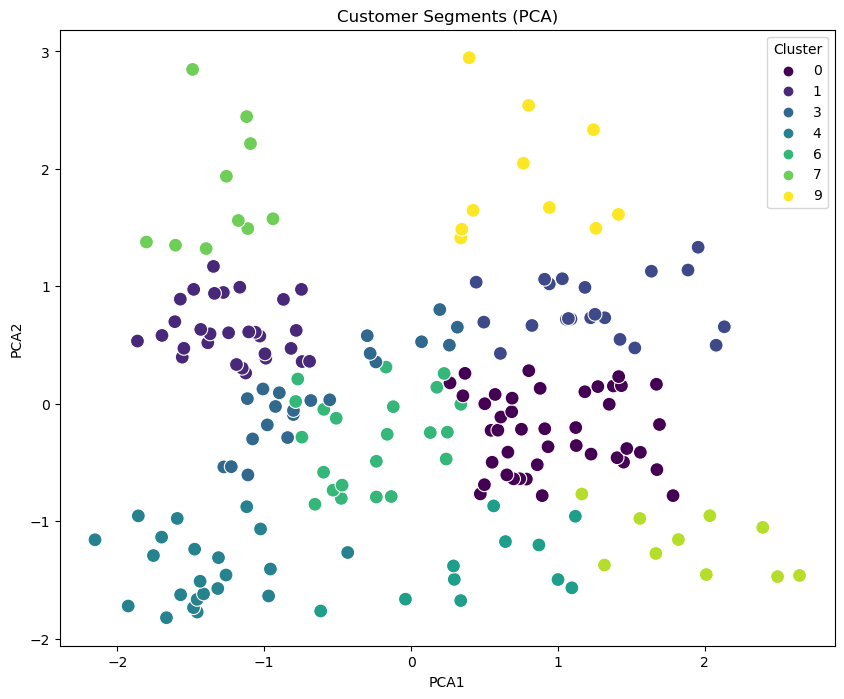

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
dataframe['PCA1'] = principal_components[:,0]
dataframe['PCA2'] = principal_components[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=dataframe, palette='viridis', s=100)
plt.title('Customer Segments (PCA)')
plt.show()

##### `PCA`
- PCA (Principal Component Analysis) is a dimensionality reduction technique that:
    - Identifies patterns in high-dimensional data
    - Projects data onto new axes ("principal components") that capture maximum variance
    - Preserves the most important information while reducing complexity

- `Key Properties:`
- PC1: Direction of maximum variance (most important axis)
- PC2: Orthogonal to PC1, captures next-highest variance
- Each subsequent PC is orthogonal to the previous ones


`Use of PCA for Cluster Analysis`

- Problem with High-Dimensional Data
- Clustering on raw features (e.g., Age, Income, Spending Score) can be:
- Computationally expensive
- Hard to visualize (3D+ plots are unintuitive)
- Noisy (irrelevant features may obscure clusters)

###### Analyze and Profile Each Cluster

In [32]:
cluster_profile = dataframe.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Genre': lambda x: x.mode()[0]
}).reset_index()

print(cluster_profile)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)   Genre
0        0  56.720930           53.488372               48.976744  Female
1        1  32.862069           78.551724               82.172414  Female
2        2  46.000000           80.285714               16.809524    Male
3        3  21.000000           63.227273               40.681818  Female
4        4  25.272727           25.727273               79.363636  Female
5        5  34.090909           23.545455               25.454545  Female
6        6  33.409091           53.136364               50.318182  Female
7        7  32.200000          109.700000               82.000000  Female
8        8  55.200000           26.900000               13.000000  Female
9        9  41.000000          109.700000               22.000000  Female


##### `Marketing Strategies for Each Segment`

- Based on the cluster profiles, the tailored strategies are:

    - Cluster 0: High Income, Low Spenders
        - Profile: High income but conservative spenders
        - Strategy: Luxury product showcases, exclusive memberships
        - Tactics: Private shopping events, high-end brand collaborations
        - insight: Financially secure but cautious spenders.
        - Strategy: Convert savings into purchases.
            - Tactics:
                - "Quiet Luxury" Campaigns: Highlight timeless value (e.g., "Investment-grade apparel").
                - Membership Perks: Offer free financial consultations with purchases.
                - Trigger: Target post-tax-season (when disposable income is reviewed).

    - Cluster 1: Average Income, Average Spenders
        - Profile: Middle-aged with moderate spending
        - Strategy: Value-based promotions
        - Tactics: Bundle offers, loyalty programs
        - Strategy: Foster loyalty through exclusivity.
            - Tactics:
                - VIP Early Access: 24-hour previews of new collections.
                - Personalized Bundles: "Complete Your Look" suggestions.
                - Channel: Instagram + Email (high engagement for this demo).

    - Cluster 2: High Income, High Spenders
        - Profile: Young, high-earning big spenders
        - Strategy: Premium experiences
        - Tactics: VIP treatment, limited edition products
        - Strategy: Re-engage with utility-focused messaging.
            - Tactics:
                - "Time-Saver" Promos: Concierge shopping services.
                - Gifting Campaigns: "For the Man Who Has Everything" guides.
                - Channel: LinkedIn (professional context).

    - Cluster 3: Low Income, High Spenders
        - Profile: Young, low-income but spend freely
        - Strategy: Trend-focused marketing
        - Tactics: Social media campaigns, influencer collaborations
        - Strategy: Leverage social proof.
            - Tactics:
                - Micro-Influencer Collabs: Hauls with mid-tier influencers.
                - Pay-Later Options: Split payments (Afterpay/Klarna).
                - Platform: TikTok + Pinterest (visual discovery).

    - Cluster 4: Low Income, Low Spenders

        - Profile: Older, limited spending
        - Strategy: Essential items focus
        - Tactics: Discounts on necessities, senior citizen programs
        - Strategy: Enable affordable indulgence.
            - Tactics:

                - "Dupe" Campaigns: "Luxury Look for Less" collections.
                - Reward Points: Extra points for referrals.
                - Channel: Snapchat + Reels (younger audience).
        
    - Cluster 5-9 (Low Spenders)
        - Common Trait: Low Spending Scores (13–50).
            - Unified Strategy: Reactivate with low-risk offers.
                - Tactics:
                    - "Come Back" Discounts: 20% off after 6 months inactive.
                    - Pop-Up Experiences: Local events to rebuild engagement.
        
        

